In [1]:
import os
os.getcwd()

'/Users/arthur/Desktop/factor_investment'

In [2]:
os.chdir('/Users/arthur/Desktop/factor_investment')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy

In [4]:
def mul(return_list):
    return_list = return_list[~(np.isnan(return_list))]
    new_return = 1
    for i in return_list:
        new_return = new_return*(1+i*0.01)
    
    return new_return

In [5]:
FactorName='VOL'
highGroup=pd.read_csv('./計算溢酬/data_Processed/High_'+FactorName+'.csv',dtype=str)
lowGroup=pd.read_csv('./計算溢酬/data_Processed/Low_'+FactorName+'.csv',dtype=str)
StockIndex=pd.read_csv('./計算溢酬/data/Y9999.csv')

In [6]:
allstockspool=pd.read_csv('./data/ctbcPool.csv',dtype=str)
allstockspool=allstockspool['pool'].values
# allstockspool.astype('str')
print(allstockspool, len(allstockspool))

['1101' '1102' '1103' ... '9958' '9960' '9962'] 1956


In [7]:
for i in range(1, highGroup.shape[1]):
    for j in range(len(highGroup.iloc[:, i])):
        if highGroup.iloc[j, i] == highGroup.iloc[j, i]:
            if (highGroup.iloc[j, i] not in allstockspool):
                allstockspool = np.append(allstockspool, highGroup.iloc[j, i])

print(allstockspool, len(allstockspool))

for i in range(1, lowGroup.shape[1]):
    for j in range(len(lowGroup.iloc[:, i])):
        if lowGroup.iloc[j, i] == lowGroup.iloc[j, i]:
            if (lowGroup.iloc[j, i] not in allstockspool):
                allstockspool = np.append(allstockspool, lowGroup.iloc[j, i])

# allstockspool = np.sort(allstockspool)
allstockspool.sort()
print(allstockspool, len(allstockspool))

['1101' '1102' '1103' ... '9105' '9136' '8179'] 2016
['1101' '1102' '1103' ... '9958' '9960' '9962'] 2016


In [8]:
dates=StockIndex['Date'].values
print(len(dates))
dates

5198


array(['2000-08-02', '2000-08-03', '2000-08-04', ..., '2021-07-29',
       '2021-07-30', '2021-08-02'], dtype=object)

In [9]:
# 搶救下面用的

# stock = '8359'
# data = pd.read_csv('./data/price/'+stock+'.csv')
# data = data[['Date','return','marketValue']]
# data = data.rename(columns={'marketValue':stock+'_marketValue','return':stock+'_return'})
# allStockFrame = allStockFrame.merge(data,on='Date',how='outer')

In [10]:
allStockFrame = pd.DataFrame()
for istock in range(len(allstockspool)):
    stock = allstockspool[istock]
    print(istock,'/',len(allstockspool),' processed')
    if len(stock) == 4:
        data = pd.read_csv('./data/price/'+stock+'.csv')
        data = data[['Date','return','marketValue']]
        data = data.rename(columns={'marketValue':stock+'_marketValue','return':stock+'_return'})
        
        if stock == allstockspool[0]:
            allStockFrame = data
        else:
            allStockFrame = allStockFrame.merge(data,on='Date',how='outer')

0 / 2016  processed
1 / 2016  processed
2 / 2016  processed
3 / 2016  processed
4 / 2016  processed
5 / 2016  processed
6 / 2016  processed
7 / 2016  processed
8 / 2016  processed
9 / 2016  processed
10 / 2016  processed
11 / 2016  processed
12 / 2016  processed
13 / 2016  processed
14 / 2016  processed
15 / 2016  processed
16 / 2016  processed
17 / 2016  processed
18 / 2016  processed
19 / 2016  processed
20 / 2016  processed
21 / 2016  processed
22 / 2016  processed
23 / 2016  processed
24 / 2016  processed
25 / 2016  processed
26 / 2016  processed
27 / 2016  processed
28 / 2016  processed
29 / 2016  processed
30 / 2016  processed
31 / 2016  processed
32 / 2016  processed
33 / 2016  processed
34 / 2016  processed
35 / 2016  processed
36 / 2016  processed
37 / 2016  processed
38 / 2016  processed
39 / 2016  processed
40 / 2016  processed
41 / 2016  processed
42 / 2016  processed
43 / 2016  processed
44 / 2016  processed
45 / 2016  processed
46 / 2016  processed
47 / 2016  processed
48

378 / 2016  processed
379 / 2016  processed
380 / 2016  processed
381 / 2016  processed
382 / 2016  processed
383 / 2016  processed
384 / 2016  processed
385 / 2016  processed
386 / 2016  processed
387 / 2016  processed
388 / 2016  processed
389 / 2016  processed
390 / 2016  processed
391 / 2016  processed
392 / 2016  processed
393 / 2016  processed
394 / 2016  processed
395 / 2016  processed
396 / 2016  processed
397 / 2016  processed
398 / 2016  processed
399 / 2016  processed
400 / 2016  processed
401 / 2016  processed
402 / 2016  processed
403 / 2016  processed
404 / 2016  processed
405 / 2016  processed
406 / 2016  processed
407 / 2016  processed
408 / 2016  processed
409 / 2016  processed
410 / 2016  processed
411 / 2016  processed
412 / 2016  processed
413 / 2016  processed
414 / 2016  processed
415 / 2016  processed
416 / 2016  processed
417 / 2016  processed
418 / 2016  processed
419 / 2016  processed
420 / 2016  processed
421 / 2016  processed
422 / 2016  processed
423 / 2016

753 / 2016  processed
754 / 2016  processed
755 / 2016  processed
756 / 2016  processed
757 / 2016  processed
758 / 2016  processed
759 / 2016  processed
760 / 2016  processed
761 / 2016  processed
762 / 2016  processed
763 / 2016  processed
764 / 2016  processed
765 / 2016  processed
766 / 2016  processed
767 / 2016  processed
768 / 2016  processed
769 / 2016  processed
770 / 2016  processed
771 / 2016  processed
772 / 2016  processed
773 / 2016  processed
774 / 2016  processed
775 / 2016  processed
776 / 2016  processed
777 / 2016  processed
778 / 2016  processed
779 / 2016  processed
780 / 2016  processed
781 / 2016  processed
782 / 2016  processed
783 / 2016  processed
784 / 2016  processed
785 / 2016  processed
786 / 2016  processed
787 / 2016  processed
788 / 2016  processed
789 / 2016  processed
790 / 2016  processed
791 / 2016  processed
792 / 2016  processed
793 / 2016  processed
794 / 2016  processed
795 / 2016  processed
796 / 2016  processed
797 / 2016  processed
798 / 2016

1120 / 2016  processed
1121 / 2016  processed
1122 / 2016  processed
1123 / 2016  processed
1124 / 2016  processed
1125 / 2016  processed
1126 / 2016  processed
1127 / 2016  processed
1128 / 2016  processed
1129 / 2016  processed
1130 / 2016  processed
1131 / 2016  processed
1132 / 2016  processed
1133 / 2016  processed
1134 / 2016  processed
1135 / 2016  processed
1136 / 2016  processed
1137 / 2016  processed
1138 / 2016  processed
1139 / 2016  processed
1140 / 2016  processed
1141 / 2016  processed
1142 / 2016  processed
1143 / 2016  processed
1144 / 2016  processed
1145 / 2016  processed
1146 / 2016  processed
1147 / 2016  processed
1148 / 2016  processed
1149 / 2016  processed
1150 / 2016  processed
1151 / 2016  processed
1152 / 2016  processed
1153 / 2016  processed
1154 / 2016  processed
1155 / 2016  processed
1156 / 2016  processed
1157 / 2016  processed
1158 / 2016  processed
1159 / 2016  processed
1160 / 2016  processed
1161 / 2016  processed
1162 / 2016  processed
1163 / 2016

1478 / 2016  processed
1479 / 2016  processed
1480 / 2016  processed
1481 / 2016  processed
1482 / 2016  processed
1483 / 2016  processed
1484 / 2016  processed
1485 / 2016  processed
1486 / 2016  processed
1487 / 2016  processed
1488 / 2016  processed
1489 / 2016  processed
1490 / 2016  processed
1491 / 2016  processed
1492 / 2016  processed
1493 / 2016  processed
1494 / 2016  processed
1495 / 2016  processed
1496 / 2016  processed
1497 / 2016  processed
1498 / 2016  processed
1499 / 2016  processed
1500 / 2016  processed
1501 / 2016  processed
1502 / 2016  processed
1503 / 2016  processed
1504 / 2016  processed
1505 / 2016  processed
1506 / 2016  processed
1507 / 2016  processed
1508 / 2016  processed
1509 / 2016  processed
1510 / 2016  processed
1511 / 2016  processed
1512 / 2016  processed
1513 / 2016  processed
1514 / 2016  processed
1515 / 2016  processed
1516 / 2016  processed
1517 / 2016  processed
1518 / 2016  processed
1519 / 2016  processed
1520 / 2016  processed
1521 / 2016

1835 / 2016  processed
1836 / 2016  processed
1837 / 2016  processed
1838 / 2016  processed
1839 / 2016  processed
1840 / 2016  processed
1841 / 2016  processed
1842 / 2016  processed
1843 / 2016  processed
1844 / 2016  processed
1845 / 2016  processed
1846 / 2016  processed
1847 / 2016  processed
1848 / 2016  processed
1849 / 2016  processed
1850 / 2016  processed
1851 / 2016  processed
1852 / 2016  processed
1853 / 2016  processed
1854 / 2016  processed
1855 / 2016  processed
1856 / 2016  processed
1857 / 2016  processed
1858 / 2016  processed
1859 / 2016  processed
1860 / 2016  processed
1861 / 2016  processed
1862 / 2016  processed
1863 / 2016  processed
1864 / 2016  processed
1865 / 2016  processed
1866 / 2016  processed
1867 / 2016  processed
1868 / 2016  processed
1869 / 2016  processed
1870 / 2016  processed
1871 / 2016  processed
1872 / 2016  processed
1873 / 2016  processed
1874 / 2016  processed
1875 / 2016  processed
1876 / 2016  processed
1877 / 2016  processed
1878 / 2016

In [11]:
allStockFrame

,Date,1101_return,1101_marketValue,1102_return,1102_marketValue,1103_return,1103_marketValue,1104_return,1104_marketValue,1108_return,...,9951_return,9951_marketValue,9955_return,9955_marketValue,9958_return,9958_marketValue,9960_return,9960_marketValue,9962_return,9962_marketValue
0,2005-01-03,2.3923,56619,1.3393,49279,1.2903,10984,1.9305,5487,2.6316,...,-0.4376,1638.0,0.3472,1273,NaN,NaN,-0.9404,371,NaN,NaN
1,2005-01-04,-1.4019,55825,-2.2026,48193,-1.2739,10844,-3.0303,5321,-1.0256,...,-0.6593,1627.0,0.3460,1277,NaN,NaN,0.0000,371,NaN,NaN
2,2005-01-05,-0.4739,55561,-1.3514,47542,-0.6452,10774,-0.7813,5279,-2.5907,...,-1.5487,1602.0,0.0000,1277,NaN,NaN,-1.2658,367,NaN,NaN
3,2005-01-06,-0.9524,55031,-0.4566,47325,-0.6494,10704,1.1811,5342,-0.5319,...,0.6742,1612.0,-0.3448,1273,NaN,NaN,0.3205,368,NaN,NaN
4,2005-01-07,-3.8462,52915,-1.8349,46456,-3.5948,10319,0.3891,5362,-0.5348,...,-0.2232,1609.0,-0.3460,1269,NaN,NaN,1.2780,373,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,2021-08-20,-0.1082,282603,-0.8074,151180,0.4819,16154,-0.2439,13366,0.4167,...,0.1171,6404.0,1.2048,1734,-1.3636,25133.0,0.0000,897,-3.0899,1556.0
4105,2021-08-23,1.4085,286584,1.3953,153301,1.6787,16425,1.7115,13595,4.1494,...,1.9883,6531.0,1.1905,1755,0.9217,25364.0,0.9363,905,9.8551,1710.0
4106,2021-08-24,-0.1068,286277,0.4587,154706,0.7075,16542,-0.9615,13464,0.0000,...,-2.1789,6389.0,0.2941,1760,0.9132,25596.0,0.0000,905,0.5277,1719.0
4107,2021-08-25,0.9626,289033,0.3425,155339,1.1710,16735,0.4854,13530,1.5936,...,0.3517,6411.0,1.1730,1780,3.6199,26523.0,-0.1855,904,2.8871,1768.0


In [12]:
# 3, 5, 8, 11月底
print(highGroup.columns.values == lowGroup.columns.values)
print(highGroup.columns.values)
print(highGroup)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
['Unnamed: 0' '2010-05-31' '2010-08-31' '2010-11-30' '2011-03-31'
 '2011-05-31' '2011-08-31' '2011-11-30' '2012-03-31' '2012-05-31'
 '2012-08-31' '2012-11-30' '2013-03-31' '2013-05-31' '2013-08-31'
 '2013-11-30' '2014-03-31' '2014-05-31' '2014-08-31' '2014-11-30'
 '2015-03-31' '2015-05-31' '2015-08-31' '2015-11-30' '2016-03-31'
 '2016-05-31' '2016-08-31' '2016-11-30' '2017-03-31' '2017-05-31'
 '2017-08-31' '2017-11-30' '2018-03-31' '2018-05-31' '2018-08-31'
 '2018-11-30' '2019-03-31' '2019-05-31' '2019-08-31' '2019-11-30']
    Unnamed: 0 2010-05-31 2010-08-31 2010-11-30 2011-03-31 2011-05-31  \
0            0       2028       4171       2509       2527       1440   
1            1       1737       1102       5607       3315       2929   
2      

In [13]:
highGroup = highGroup.iloc[:, 1:]
lowGroup = lowGroup.iloc[:, 1:]

In [14]:
highGroup.columns = pd.to_datetime(highGroup.columns).date
lowGroup.columns = pd.to_datetime(lowGroup.columns).date
allStockFrame.Date = pd.to_datetime(allStockFrame.Date).dt.date

In [15]:
premium = pd.DataFrame()

for j in range(highGroup.shape[1]):
    start_date = highGroup.columns[j] + datetime.timedelta(days=30)
    end_date = highGroup.columns[j] + datetime.timedelta(days=120)
    print(start_date, end_date)
    
    high_return = []
    low_return = []
    for i in range(highGroup.shape[0]):
        if highGroup.iloc[i, j] == highGroup.iloc[i, j]:
            print(i, j)
            col_name = highGroup.iloc[i, j] + '_return'
#             print(col_name)
            high_return.append( mul(allStockFrame.loc[(allStockFrame.Date > start_date) & (allStockFrame.Date < end_date), col_name]) )
            col_name = lowGroup.iloc[i, j] + '_return'
            low_return.append( mul(allStockFrame.loc[(allStockFrame.Date > start_date) & (allStockFrame.Date < end_date), col_name]) )
    
#     print(high_return, low_return)
#     print(sum(high_return)/len(high_return), sum(low_return)/len(low_return))
#     print(sum(high_return)/len(high_return) - sum(low_return)/len(low_return))
    premium.loc[0, start_date] = (sum(high_return)/len(high_return)) - (sum(low_return)/len(low_return))
    premium.loc[1, start_date] = (sum(high_return)/len(high_return))
        

2010-06-30 2010-09-28
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
2010-09-30 2010-12-29
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1

46 9
47 9
48 9
49 9
50 9
51 9
52 9
53 9
54 9
55 9
56 9
57 9
58 9
59 9
60 9
61 9
62 9
63 9
64 9
65 9
66 9
67 9
68 9
69 9
70 9
71 9
72 9
73 9
74 9
75 9
76 9
77 9
78 9
79 9
80 9
81 9
82 9
83 9
84 9
85 9
86 9
87 9
88 9
89 9
90 9
91 9
92 9
93 9
94 9
95 9
96 9
97 9
98 9
99 9
100 9
101 9
102 9
103 9
104 9
105 9
106 9
107 9
108 9
109 9
110 9
111 9
112 9
113 9
114 9
115 9
116 9
117 9
118 9
119 9
120 9
121 9
122 9
123 9
124 9
125 9
126 9
127 9
128 9
129 9
130 9
131 9
132 9
133 9
134 9
135 9
136 9
137 9
138 9
139 9
140 9
141 9
142 9
143 9
144 9
145 9
146 9
147 9
148 9
149 9
150 9
151 9
152 9
153 9
154 9
155 9
156 9
157 9
158 9
159 9
160 9
161 9
162 9
163 9
164 9
165 9
166 9
167 9
168 9
169 9
170 9
171 9
172 9
173 9
174 9
175 9
176 9
2012-12-30 2013-03-30
0 10
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
10 10
11 10
12 10
13 10
14 10
15 10
16 10
17 10
18 10
19 10
20 10
21 10
22 10
23 10
24 10
25 10
26 10
27 10
28 10
29 10
30 10
31 10
32 10
33 10
34 10
35 10
36 10
37 10
38 10
39 10
40 10
41 10
42 1

56 16
57 16
58 16
59 16
60 16
61 16
62 16
63 16
64 16
65 16
66 16
67 16
68 16
69 16
70 16
71 16
72 16
73 16
74 16
75 16
76 16
77 16
78 16
79 16
80 16
81 16
82 16
83 16
84 16
85 16
86 16
87 16
88 16
89 16
90 16
91 16
92 16
93 16
94 16
95 16
96 16
97 16
98 16
99 16
100 16
101 16
102 16
103 16
104 16
105 16
106 16
107 16
108 16
109 16
110 16
111 16
112 16
113 16
114 16
115 16
116 16
117 16
118 16
119 16
120 16
121 16
122 16
123 16
124 16
125 16
126 16
127 16
128 16
129 16
130 16
131 16
132 16
133 16
134 16
135 16
136 16
137 16
138 16
139 16
140 16
141 16
142 16
143 16
144 16
145 16
146 16
147 16
148 16
149 16
150 16
151 16
152 16
153 16
154 16
155 16
156 16
157 16
158 16
159 16
160 16
161 16
162 16
163 16
164 16
165 16
166 16
167 16
168 16
169 16
170 16
171 16
172 16
173 16
174 16
175 16
176 16
177 16
178 16
179 16
180 16
181 16
182 16
183 16
184 16
185 16
186 16
187 16
188 16
189 16
2014-09-30 2014-12-29
0 17
1 17
2 17
3 17
4 17
5 17
6 17
7 17
8 17
9 17
10 17
11 17
12 17
13 17
14 17
15 1

181 22
182 22
183 22
184 22
185 22
186 22
187 22
188 22
189 22
190 22
191 22
192 22
193 22
194 22
195 22
2016-04-30 2016-07-29
0 23
1 23
2 23
3 23
4 23
5 23
6 23
7 23
8 23
9 23
10 23
11 23
12 23
13 23
14 23
15 23
16 23
17 23
18 23
19 23
20 23
21 23
22 23
23 23
24 23
25 23
26 23
27 23
28 23
29 23
30 23
31 23
32 23
33 23
34 23
35 23
36 23
37 23
38 23
39 23
40 23
41 23
42 23
43 23
44 23
45 23
46 23
47 23
48 23
49 23
50 23
51 23
52 23
53 23
54 23
55 23
56 23
57 23
58 23
59 23
60 23
61 23
62 23
63 23
64 23
65 23
66 23
67 23
68 23
69 23
70 23
71 23
72 23
73 23
74 23
75 23
76 23
77 23
78 23
79 23
80 23
81 23
82 23
83 23
84 23
85 23
86 23
87 23
88 23
89 23
90 23
91 23
92 23
93 23
94 23
95 23
96 23
97 23
98 23
99 23
100 23
101 23
102 23
103 23
104 23
105 23
106 23
107 23
108 23
109 23
110 23
111 23
112 23
113 23
114 23
115 23
116 23
117 23
118 23
119 23
120 23
121 23
122 23
123 23
124 23
125 23
126 23
127 23
128 23
129 23
130 23
131 23
132 23
133 23
134 23
135 23
136 23
137 23
138 23
139 23
140

48 29
49 29
50 29
51 29
52 29
53 29
54 29
55 29
56 29
57 29
58 29
59 29
60 29
61 29
62 29
63 29
64 29
65 29
66 29
67 29
68 29
69 29
70 29
71 29
72 29
73 29
74 29
75 29
76 29
77 29
78 29
79 29
80 29
81 29
82 29
83 29
84 29
85 29
86 29
87 29
88 29
89 29
90 29
91 29
92 29
93 29
94 29
95 29
96 29
97 29
98 29
99 29
100 29
101 29
102 29
103 29
104 29
105 29
106 29
107 29
108 29
109 29
110 29
111 29
112 29
113 29
114 29
115 29
116 29
117 29
118 29
119 29
120 29
121 29
122 29
123 29
124 29
125 29
126 29
127 29
128 29
129 29
130 29
131 29
132 29
133 29
134 29
135 29
136 29
137 29
138 29
139 29
140 29
141 29
142 29
143 29
144 29
145 29
146 29
147 29
148 29
149 29
150 29
151 29
152 29
153 29
154 29
155 29
156 29
157 29
158 29
159 29
160 29
161 29
162 29
163 29
164 29
165 29
166 29
167 29
168 29
169 29
170 29
171 29
172 29
173 29
174 29
175 29
176 29
177 29
178 29
179 29
180 29
181 29
182 29
183 29
184 29
185 29
186 29
187 29
188 29
189 29
190 29
191 29
192 29
193 29
194 29
195 29
196 29
197 29
19

74 35
75 35
76 35
77 35
78 35
79 35
80 35
81 35
82 35
83 35
84 35
85 35
86 35
87 35
88 35
89 35
90 35
91 35
92 35
93 35
94 35
95 35
96 35
97 35
98 35
99 35
100 35
101 35
102 35
103 35
104 35
105 35
106 35
107 35
108 35
109 35
110 35
111 35
112 35
113 35
114 35
115 35
116 35
117 35
118 35
119 35
120 35
121 35
122 35
123 35
124 35
125 35
126 35
127 35
128 35
129 35
130 35
131 35
132 35
133 35
134 35
135 35
136 35
137 35
138 35
139 35
140 35
141 35
142 35
143 35
144 35
145 35
146 35
147 35
148 35
149 35
150 35
151 35
152 35
153 35
154 35
155 35
156 35
157 35
158 35
159 35
160 35
161 35
162 35
163 35
164 35
165 35
166 35
167 35
168 35
169 35
170 35
171 35
172 35
173 35
174 35
175 35
176 35
177 35
178 35
179 35
180 35
181 35
182 35
183 35
184 35
185 35
186 35
187 35
188 35
189 35
190 35
191 35
192 35
193 35
194 35
195 35
196 35
197 35
198 35
199 35
200 35
201 35
202 35
203 35
204 35
205 35
206 35
207 35
208 35
209 35
210 35
2019-06-30 2019-09-28
0 36
1 36
2 36
3 36
4 36
5 36
6 36
7 36
8 36


In [16]:
premium

,2010-06-30,2010-09-30,2010-12-30,2011-04-30,2011-06-30,2011-09-30,2011-12-30,2012-04-30,2012-06-30,2012-09-30,...,2017-09-30,2017-12-30,2018-04-30,2018-06-30,2018-09-30,2018-12-30,2019-04-30,2019-06-30,2019-09-30,2019-12-30
0,-0.018690,0.002651,-0.000571,0.037524,0.046409,-0.004838,-0.025947,0.000511,0.045813,-0.005535,...,-0.015155,-0.034619,-0.018159,0.089405,0.045676,-0.041541,0.006113,-0.053250,-0.028778,0.030519
1,1.112198,1.036181,0.959411,1.004266,0.847456,0.922621,1.215241,0.962799,1.088375,0.992119,...,1.030912,1.015704,1.037321,0.997230,0.945587,1.079879,1.048706,1.026085,1.042467,0.853880


In [17]:
cumu_premium = copy.copy(premium)

for i in range(len(premium.iloc[0, :])):
    if i != 0:
        cumu_premium.iloc[0, i] = cumu_premium.iloc[0, i-1] + premium.iloc[0, i]
        cumu_premium.iloc[1, i] = cumu_premium.iloc[1, i-1] * premium.iloc[1, i]

In [18]:
cumu_premium

,2010-06-30,2010-09-30,2010-12-30,2011-04-30,2011-06-30,2011-09-30,2011-12-30,2012-04-30,2012-06-30,2012-09-30,...,2017-09-30,2017-12-30,2018-04-30,2018-06-30,2018-09-30,2018-12-30,2019-04-30,2019-06-30,2019-09-30,2019-12-30
0,-0.018690,-0.016040,-0.016611,0.020913,0.067322,0.062484,0.036537,0.037049,0.082862,0.077326,...,-0.070500,-0.105120,-0.123279,-0.033873,0.011802,-0.029738,-0.023625,-0.076876,-0.105654,-0.075135
1,1.112198,1.152438,1.105662,1.110378,0.940997,0.868183,1.055052,1.015803,1.105574,1.096861,...,1.889426,1.919098,1.990721,1.985207,1.877186,2.027133,2.125867,2.181320,2.273954,1.941684


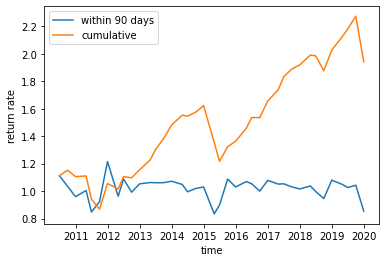

In [19]:
fig, ax = plt.subplots()
ax.plot(premium.columns, premium.iloc[1, :], label='within 90 days')
ax.plot(cumu_premium.columns, cumu_premium.iloc[1, :], label='cumulative')
ax.set_xlabel('time')  # Add an x-label to the axes.
ax.set_ylabel('return rate')  # Add a y-label to the axes.
ax.legend();  # Add a legend.

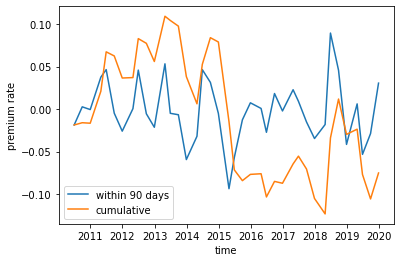

In [20]:
fig, ax = plt.subplots()
ax.plot(premium.columns, premium.iloc[0, :], label='within 90 days')
ax.plot(cumu_premium.columns, cumu_premium.iloc[0, :], label='cumulative')
ax.set_xlabel('time')  # Add an x-label to the axes.
ax.set_ylabel('premium rate')  # Add a y-label to the axes.
ax.legend();  # Add a legend.

--- 2013-05-31 0.0010605909090909103 1.0010605909090908 ---
--- 2013-08-30 0.011802090909090908 1.0128751990085083 ---
--- 2013-11-29 0.005915347826086956 1.0188667081150606 ---
--- 2014-03-31 -0.0055994960474308325 1.0131615680101116 ---
--- 2014-05-30 -0.003020644268774704 1.0101011673263591 ---
--- 2014-08-29 -0.013034478260869564 0.9969350256195647 ---
--- 2014-11-28 0.0006730395256917001 0.9976060022963532 ---
--- 2015-03-31 -0.006716962450592883 0.9909051202384426 ---
--- 2015-05-29 -0.0076450108695652165 0.9833296398235118 ---
--- 2015-08-31 0.016758286231884058 0.9998085593879696 ---
--- 2015-11-30 0.00026722101449275226 1.0000757292455078 ---
--- 2016-03-31 -0.016984677536231885 0.9830897654724609 ---
--- 2016-05-31 -0.009824583333333334 0.9734313181474296 ---
--- 2016-08-31 -0.0047185000000000005 0.968838182472751 ---
--- 2016-11-30 -0.0024963 0.9664196717178443 ---
--- 2017-03-31 0.001051325 0.9674356928792129 ---
--- 2017-05-31 -0.0023231433333333338 0.9651882010988718 ---


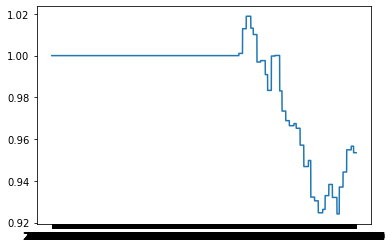

In [16]:
poolDates=list(highGroup.columns.values)
Values=[]
FactorFrame=pd.DataFrame()
AccValue=1
AccValues=[]
for idate in range(len(dates)):
    
    date=dates[idate]
    value=0
    changePool=False
    adjustMonthes=['03','05','08','11']  ##資料是3/5/8/11月

    if idate<len(dates)-1:     
        if date.split('-')[1] != dates[idate+1].split('-')[1]: ##end of month
            if date.split('-')[1] in adjustMonthes:
                changePool=True
                
    if len(np.where(np.array(poolDates)<date)[0])>0:
        
        if changePool:
            poolDate=poolDates[np.where(np.array(poolDates)<date)[0][-1]]
        
            highPool=highGroup[poolDate]
            highPool=highPool.dropna()
            highPool=highPool.values
            lowPool=lowGroup[poolDate]
            lowPool=lowPool.dropna()
            lowPool=lowPool.values
            
            HighStockFrame=pd.DataFrame()
            LowStockFrame=pd.DataFrame()
            highPoolFeatures=['Date']
            lowPoolFeatures=['Date']

            for stock in highPool:
                highPoolFeatures.append(stock+'_marketValue')
                highPoolFeatures.append(stock+'_return')

            
            for stock in lowPool:
                lowPoolFeatures.append(stock+'_marketValue')
                lowPoolFeatures.append(stock+'_return')
        
#             if ('2020-01-01' >= date) & (date >= '2010-01-01'):
            if (date >= '2013-04-30'):
                # print(date)
#                 try:
                LowStockFrame=allStockFrame[lowPoolFeatures]
                HighStockFrame=allStockFrame[highPoolFeatures]
                NowHighStockFrame=HighStockFrame[HighStockFrame['Date']==date]
                NowLowStockFrame=LowStockFrame[LowStockFrame['Date']==date]
#                 except:
#                     for i in lowPoolFeatures:
#                         try:
#                             a = allStockFrame[i]
#                         except:
#                             print(i)
#                     for i in highPoolFeatures:
#                         try:
#                             a = allStockFrame[i]
#                         except:
#                             print(i)

                AllHighStockReturns=[]
                AllHighStockMarketValues=[]
                AllLowStockReturns=[]
                AllLowStockMarketValues=[]
                # print('NowHighStockFrame',NowHighStockFrame)
                # print('NowLowStockFrame',NowLowStockFrame)
                for stock in highPool:
                    if NowHighStockFrame[stock+'_return'].values[0]==np.nan:
                        AllHighStockMarketValues.append(0)
                        AllHighStockReturns.append(0)
                    elif NowHighStockFrame[stock+'_marketValue'].values[0]==np.nan:
                        AllHighStockMarketValues.append(0)
                        AllHighStockReturns.append(0)
                    else:
                        AllHighStockMarketValues.append(NowHighStockFrame[stock+'_marketValue'].values[0])
                        AllHighStockReturns.append(NowHighStockFrame[stock+'_return'].values[0])

                for stock in lowPool:
                    # print(NowLowStockFrame[stock+'_return'].values[0])
                    if NowLowStockFrame[stock+'_return'].values[0]==np.nan:
                        AllLowStockMarketValues.append(0)
                        AllLowStockReturns.append(0)
                    elif NowLowStockFrame[stock+'_marketValue'].values[0]==np.nan:
                        AllLowStockMarketValues.append(0)
                        AllLowStockReturns.append(0)
                    else:
                        AllLowStockMarketValues.append(NowLowStockFrame[stock+'_marketValue'].values[0])
                        AllLowStockReturns.append(NowLowStockFrame[stock+'_return'].values[0])

                SumAllHighStock=np.nansum(AllHighStockMarketValues)
                SumAllLowStock=np.nansum(AllLowStockMarketValues)

                AllHighStockMarketValues=AllHighStockMarketValues/SumAllHighStock
                AllLowStockMarketValues=AllLowStockMarketValues/SumAllLowStock

                ### Method1:市值加權平均報酬
                # valueHigh=np.nansum(np.multiply(np.array(AllHighStockMarketValues),np.array(AllHighStockReturns)))/100
                # valueLow=np.nansum(np.multiply(np.array(AllLowStockMarketValues),np.array(AllLowStockReturns)))/100

                ### Method2:簡單平均報酬
                valueHigh=np.nanmean(np.array(AllHighStockReturns))/100
                valueLow=np.nanmean(np.array(AllLowStockReturns))/100



                value=valueHigh-valueLow
                AccValue=AccValue*(1+value)
                print('---',date,value,AccValue,'---')
    Values.append(value)
    AccValues.append(AccValue)

FactorFrame['Date']=dates
FactorFrame['DailyReturn']=Values
FactorFrame['AccReturn']=AccValues
FactorFrame.to_csv('./FactorValues/'+FactorName+'.csv')
plt.plot(dates,AccValues)
plt.show()

In [169]:
FactorFrame

,Date,DailyReturn,AccReturn
0,2000-08-02,0.0,1.000000
1,2000-08-03,0.0,1.000000
2,2000-08-04,0.0,1.000000
3,2000-08-05,0.0,1.000000
4,2000-08-07,0.0,1.000000
...,...,...,...
5193,2021-07-27,0.0,0.953482
5194,2021-07-28,0.0,0.953482
5195,2021-07-29,0.0,0.953482
5196,2021-07-30,0.0,0.953482
